In [2]:
import numpy as np
from scipy.special import jv

In [3]:
def fourier(y):
    length = len(y)
    x = np.arange(0,len(y))
    an, bn = np.zeros(int(length/2), np.float64), np.zeros(int(length/2), np.float64)
    an[0] = sum(y)
    for i in range(1,int(length/2)):
        an[i] = (np.dot(y,np.cos(2*np.pi/len(y)*i*x)))
        bn[i] = (np.dot(y,np.sin(2*np.pi/len(y)*i*x)))
    return np.array([an/length*2,bn/length*2])

x1, y1 = np.loadtxt("thermal_8min.txt", unpack=True, skiprows=3)
an,bn = fourier(y1)[:,::4]
transmission = np.sqrt(an[1:]**2+bn[1:]**2)/(200/np.pi/np.arange(1,len(an)))

c:\Users\tonyk\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


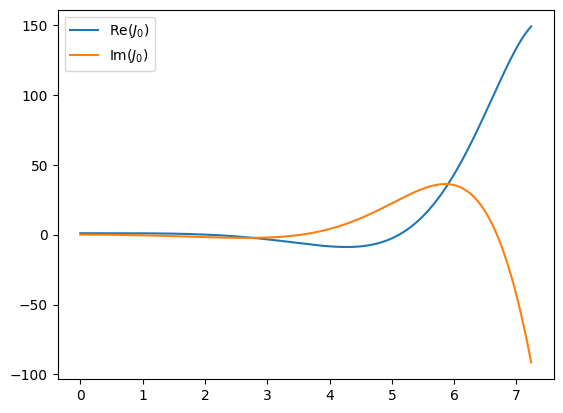

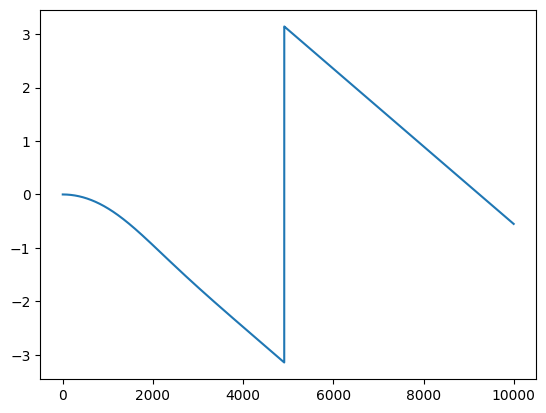

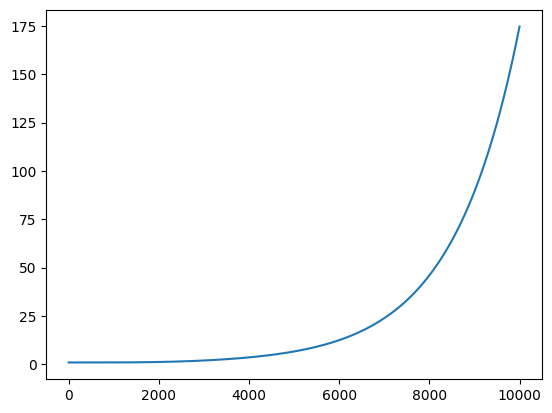

In [6]:
z = np.linspace(0,0.02,10000)*np.sqrt(1j/240*2*np.pi/1e-7)
J = jv(0,z)
plt.plot(z,J.real,label="Re($J_0$)")
plt.plot(z,J.imag,label="Im($J_0$)")
plt.legend()
plt.show()
plt.plot(np.angle(J))
plt.show()
plt.plot(abs(J))

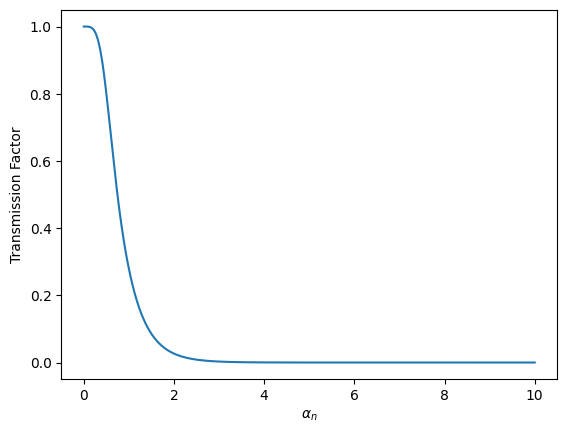

Text(0.5, 0, '$\\alpha_n$')

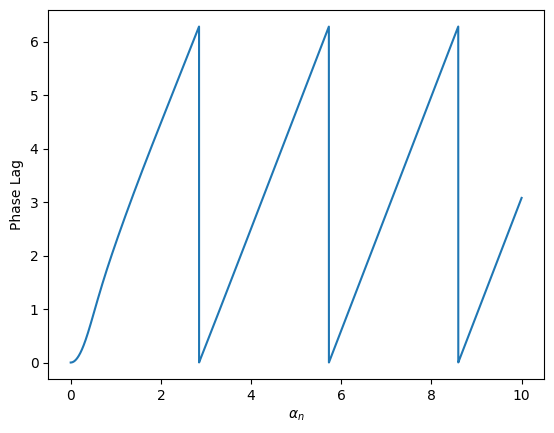

In [50]:
lim = 10
re = np.linspace(0,lim,10000)
z1 = np.linspace(0,lim,10000)*np.sqrt(1j)
z2 = np.linspace(0,lim*4.1,10000)*np.sqrt(1j)
J1 = jv(0,z1)
J2 = jv(0,z2)
plt.plot(re,abs(J1/J2))
gamma = abs(J1/J2)
plt.ylabel("Transmission Factor")
plt.xlabel(r"$\alpha_n$")
plt.show()
plt.plot(re,(np.angle(J1)-np.angle(J2))%(2*np.pi))
plt.ylabel("Phase Lag")
plt.xlabel(r"$\alpha_n$")

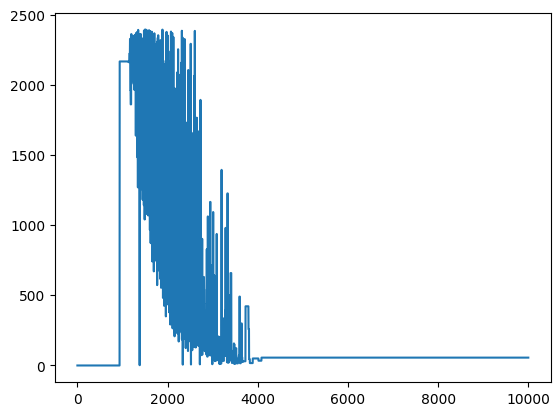

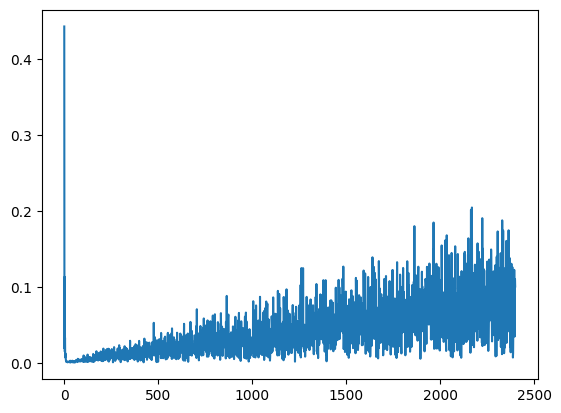

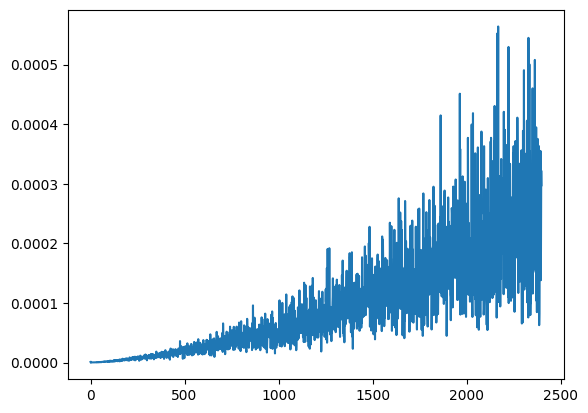

In [53]:
def find_nearest(array,value):
    return np.abs(array-value).argmin()

find_nearest = np.vectorize(find_nearest,excluded=["value"])
freq = np.arange(1,len(an))/480*2*np.pi
plt.plot(find_nearest(array=gamma,value=transmission))
plt.show()
plt.plot(transmission)
plt.show()
plt.plot(freq*0.01**2/(2*np.log(transmission)**2))